In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Systems

### Exercise 1

Optimal Salary Problem

Let's say we have to pick between 2 different job offers. The first job offer has a base weekly salary of 1000 dollars and pays 30 dollars an hour. We can represent this offer as , where  represents dollars earned that week and  represents hours worked that week. The second job offer has a base weekly salary of 100 dollars and pays 50 dollars an hour. We can represent this offer as , where  also represents dollars earned that week and  also represents hours worked that week.

We want to understand which job offer is better. If we know exactly the amount of money we'd like to make each week (), we can substitute that value into both equations and solve for  to identify which job will require us to work less hours. If we know exactly the number of hours we want to work each week (), we can substitute that value into both equations and solve for  to identify which job will make us more money for the same amount of hours worked.

Instead, if we want to understand:

At what number of hours worked can we expect to make the same amount of money at either job?
How many hours do we have to work to make more money at the first job than the second job?
To answer the first question, we need to find the  value where both the  values are equivalent. Once we know where they intersect, we can easily find out the answer to the second question.

Let's start by visualizing both of these equations on a plot and gaining a visual intuition for where they intersect.

- Use numpy.linspace() to generate 1000, evenly spaced values between 0 and 50 and assign to x.
- Transform x using the equation  and assign the result to y1.
- Transform x using the equation  and assign the result to y2.
- Generate 2 line plots on the same subplot:
    - One with x on the x-axis and y1 on the y-axis. Set the line color to "orange".
    - One with x on the x-axis and y2 on the y-axis. Set the line color to "blue".
- Skip selecting a value range for the x and y axes, and instead let matplotlib automatically select based on the data.

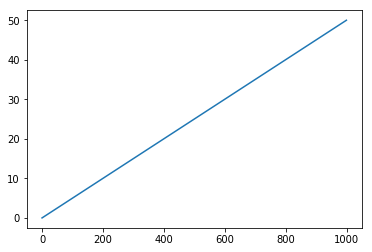

In [5]:
x = np.linspace(0, 50, 1000)
plt.plot(x)

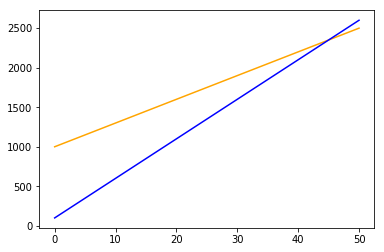

In [15]:
y1 = 30*x + 1000
y2 = 50*x + 100

plt.plot(x, y1, c='orange')
plt.plot(x, y2, c='blue')

From the plot we generated in the last screen, we can tell that both functions intersect at somewhere near the point $(45,2200)$

This point where both equations intersect is known as a solution to the system, because substituting for  and  into both functions in the system makes both of them true. Said another way, plugging in the  value of the solution into both functions yields the same  value.

Let's explore how to solve this system by hand. Because both functions share the same variables, we can represent one of the variables, say , in terms of the other variable and solve for the  value. Then, we can substitute this  value into either equation to determine the  value. This process is known as solving by elimination or the elimination method. Let's walkthrough how to apply this process to our system.

y = 1000 + 30x
y = 100  + 50x

Therefore, 1000 - 100 = 50x - 30x, hence x = 45.

Which means, when we work for 45 hours, the total compensation for both the jobs is equal. 

While we can solve a linear system like this by hand using arithmetic, we can't use the same technique to solve much more complex systems. Many real world systems are modeled using many more than 2 variables and functions and solving by hand is unfeasible.

Those types of systems can be solved using linear algebra using a variation of arithmetic elimination called __Gaussian elimination__. We'll walkthrough how to perform Gaussian elimination in the rest of this mission to find a solution to our linear system.

The two equations are:

$30x - y = -1000$

and 

$50x - y = -100$


To represent both linear functions in a system, we use an augmented matrix:

$\left[\begin{array}{rr|r}
30 & -1 & -1000 \\ 
50 & -1 & -100
\end{array}\right]$

In an augmented matrix, the coefficients from the left sides of the functions are on the left side of the bar (|), while the constants from the right sides of the functions are on the right side. An augmented matrix allows us to represent a linear system using just the real number coefficients and constants.

![](la_img1.svg)

### Exercise 2: Practice and Echelon form

In [ ]:
matrix_one = np.asarray([
    [30, -1, -1000],
    [50, -1, -100]  
], dtype=np.float32)

The important question now is, how do we arrive at the same solution we did earlier in the mission by arithmetic? Earlier in the mission, we used arithmetic to calculate the solution to the system and represented it as a coordinate pair: (45, 2350). Here's how we represent the solution when we're working with the matrix representation:

$\left[\begin{array}{rr|r}
1 & 0 & 45 \\ 
0 & 1 & 2350
\end{array}\right]$

When we convert this matrix back into equations in the standard form, you'll notice that this corresponds to the same solution:

![](la_img2.svg)

To solve a linear system, we need to perform a series of transformations to try to evolve the matrix into this form (where the solution is presented). Not all linear systems have solutions, however, and we'll explore this in further detail throughout this course.

To preserve the relationships in the linear system, we can only use the following row operations:

![](la_img3.svg)

To swap 2 rows in a NumPy ndarray object, we need to use double bracket notation to specify the row ordering change:

In [25]:
matrix =  np.asarray([
    [1, 3],
    [50, 2]  
], dtype=np.float32)
# Swap the second row (at index value 1) with the first row (at index value 0).
matrix = matrix[[1,0]]

In [26]:
matrix

array([[50.,  2.],
       [ 1.,  3.]], dtype=float32)

In [27]:
# Multipy the second row by 2.
matrix[1] = 2*matrix[1]

In [28]:
matrix

array([[50.,  2.],
       [ 2.,  6.]], dtype=float32)

In [29]:
# Add the second row to the first row.
matrix[1] = matrix[1] + matrix[0]

In [30]:
matrix

array([[50.,  2.],
       [52.,  8.]], dtype=float32)

In [31]:
# Divide the first row from matrix_one by 30.
matrix_one = np.asarray([
    [30, -1, -500],
    [50, -1, -100]  
], dtype=np.float32)
matrix_one[0] = matrix_one[0]/30

In [32]:
matrix_one

array([[ 1.0000000e+00, -3.3333335e-02, -1.6666666e+01],
       [ 5.0000000e+01, -1.0000000e+00, -1.0000000e+02]], dtype=float32)

To find the solutions of a matrix, there are 2 main steps we need to take. The first step is to rearrange the matrix into echelon form. In this form, the values on the diagonal locations are all equal to `1` and the values below the diagonal are all equal to `0`.

$\left[\begin{array}{rr|r}
1 & ? & ? \\ 
0 & 1 & ?
\end{array}\right]$

In [38]:
matrix_one = np.asarray([
    [30, -1, -1000],
    [50, -1, -100]  
], dtype=np.float32)

In [39]:
matrix_one

array([[   30.,    -1., -1000.],
       [   50.,    -1.,  -100.]], dtype=float32)

In [40]:
matrix_one[0] = matrix_one[0]/30

In [41]:
matrix_one

array([[ 1.0000000e+00, -3.3333335e-02, -3.3333332e+01],
       [ 5.0000000e+01, -1.0000000e+00, -1.0000000e+02]], dtype=float32)

In [43]:
matrix_one[1] = matrix_one[1]-50*matrix_one[0]

In [44]:
matrix_one

array([[ 1.0000000e+00, -3.3333335e-02, -3.3333332e+01],
       [ 0.0000000e+00,  6.6666675e-01,  1.5666666e+03]], dtype=float32)

In [45]:
matrix_one[1] = (30/20)*matrix_one[1]

In [46]:
matrix_one

array([[ 1.0000000e+00, -3.3333335e-02, -3.3333332e+01],
       [ 0.0000000e+00,  1.0000001e+00,  2.3500000e+03]], dtype=float32)

### Exercise 3: Transform matric to Echelon form

#### Transform matrix_three into echelon form and display using the print() function.

In [57]:
matrix_three = np.asarray([
    [1, -1/30, -1000/30],
    [0, 1, 2350]  
], dtype=np.float32)

In [58]:
matrix_three

array([[ 1.0000000e+00, -3.3333335e-02, -3.3333332e+01],
       [ 0.0000000e+00,  1.0000000e+00,  2.3500000e+03]], dtype=float32)

In [59]:
matrix_three[0] = matrix_three[0] + matrix_three[1]/30

In [60]:
matrix_three

array([[1.0000000e+00, 0.0000000e+00, 4.5000004e+01],
       [0.0000000e+00, 1.0000000e+00, 2.3500000e+03]], dtype=float32)

In most real world situations, the dependent variable $y$ is connected to multiple independent variables, not just a single one $x$. To represent those functions, we'll need to work with a different version of the general form:

$a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n = c$

In this form, $a_1 ... a_n$ are the coefficients and  is a constant value.

![](la_img4.svg)

If we have a system with more than 3 variables, we can't visualize it easily. In addition, performing Gaussian elimination becomes much more painful to do. In the next few missions, we'll develop more of the theory and geometric intuition behind linear algebra and build on that to solve these higher order linear systems.

# Vectors

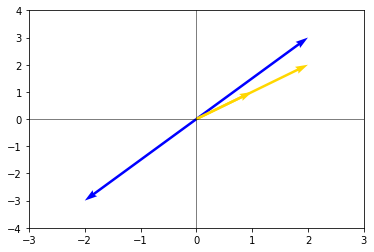

In [112]:
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(-3,3)
plt.ylim(-4,4)

plt.quiver(0,0,2,3,angles='xy', scale_units='xy', scale=1,  color='blue')
plt.quiver(0,0,-2,-3, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(0,0,1,1, angles='xy', scale_units='xy', scale=1, color='gold')
plt.quiver(0,0,2,2, angles='xy', scale_units='xy', scale=1, color='gold')

### Exercise 4

- Plot the vector $\begin{bmatrix} 3\\ 0 \end{bmatrix}$. This vector should originate at $(0,0)$.
- Plot the vector $\begin{bmatrix} 0\\ 3 \end{bmatrix}$. This vector should originate at $(3,0)$.
- Add both of these vectors and plot the resulting vector. This vector should originate at $(0,0)$. When calling `pyplot.quiver()`, use the color parameter to set the color to `green`.

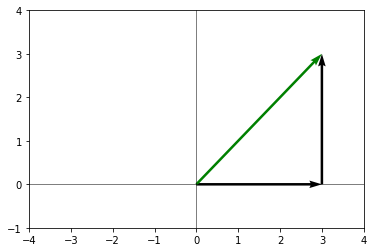

In [114]:
# This code draws the x and y axis as lines.
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(-4,4)
plt.ylim(-1,4)

plt.quiver(0, 0, 3, 0, angles='xy', scale_units='xy', scale=1)
plt.quiver(3, 0, 0, 3, angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, 3, 3, angles='xy', scale_units='xy', scale=1, color='green')

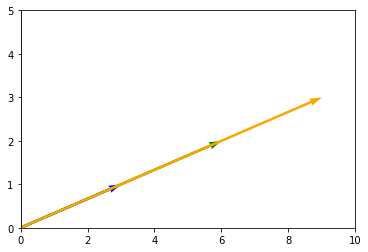

In [115]:
plt.axhline(0, c='black', lw=0.5)
plt.axvline(0, c='black', lw=0.5)
plt.xlim(0,10)
plt.ylim(0,5)

plt.quiver(0, 0, 3, 1, angles='xy', scale_units='xy', scale=1, color='blue')
plt.quiver(0, 0, 6, 2, angles='xy', scale_units='xy', scale=1, color='green')
plt.quiver(0, 0, 9, 3, angles='xy', scale_units='xy', scale=1, color='orange')
plt.show()

#### Dot Product

In [117]:
vector_one = np.asarray([
    [1],
    [2],
    [1]
], dtype=np.float32)

vector_two = np.asarray([
    [3],
    [0],
    [1]
], dtype=np.float32)

dot_product = np.dot(vector_one[:,0], vector_two)
print(dot_product)

[4.]


### The Matrix Equation

The last key concept we'll briefly introduce in this mission is the matrix equation. The matrix equation is the representation of a linear system using only matrices and vectors. Here's the augmented matrix we started out with:

$\left[\begin{array}{rr|r}
30 & -1 & -1000 \\ 
50 & -1 & -100
\end{array}\right]$

This augmented matrix is a shorthand representation for the matrix equation:

$\left[\begin{array}{rr|r}
30 & -1 \\ 
50 & -1 
\end{array}\right] \begin{bmatrix} x\\ y \end{bmatrix} =  \begin{bmatrix} -1000\\ -100 \end{bmatrix}$

On the left side, we're multiplying a matrix containing the coefficients with the vector containing the variables. The right side contains the constant values. This separation of coefficients and variables from the constants should be familiar. This is exactly what we did in the general form as well!

It's common practice to use $x_1$, $x_2$,...$x_n$ instead of  and  to represent the individual values in the solution vector.

$\left[\begin{array}{rr|r}
30 & -1 \\ 
50 & -1 
\end{array}\right] \begin{bmatrix} x_1\\ x_2 \end{bmatrix} =  \begin{bmatrix} -1000\\ -100 \end{bmatrix}$

This allows us to work with vectors with any number of elements (instead of just 26, for the number of letters in the English alphabet). We can now introduce the arithmetic representation of the matrix equation:

$A\vec{x} = \vec{b}$

where $A$ represents the coefficient matrix, $\vec{x}$ represents the solution vector, and $\vec{b}$ represents the constants. Note that $\vec{b}$ can't be a vector containing all zeroes, also known as the zero factor and represented using $\vec{0}$.

Before we can work with this form of the system, we need to learn about the following topics in the next mission:

the rules that describe how matrices can be combined
how to multipy a matrix with a vector
how to calculate the solution vector  without using Gaussian elimination.

### Exercise 5: Matrix Inverse

- Create a function named `matrix_inverse_two()` that accepts a `2 x 2` matrix, as a NumPy ndarray, and returns the matrix inverse.This function should first calculate the determinant of the matrix.
    - If the determinant is equal to `0`, an error should be returned.
    - If the determinant is not equal to `0`, this function should return the matrix inverse.
- Calculate the inverse of `matrix_a` using the function you just wrote and assign the result to `inverse_a`.
- Multiply `inverse_a` with `matrix_a` and assign the result to `i_2`. Display `i_2` using the `print()` function.

In [123]:
matrix_a = np.asarray([
    [1.5, 3],
    [1, 4]
])

def matrix_inverse_two(mat):
    det = (mat[0,0]*mat[1,1] - mat[0,1]*mat[1,0])
    mat_ = np.asarray([
        [mat[1,1], -mat[0,1]],
        [-mat[1,0], mat[0,0]]
    ])
    if det == 0:
        raise ValueError('Determinant cannot be 0')
    inv_mat = np.dot(1/det, mat_)
    return inv_mat

inverse_a = matrix_inverse_two(matrix_a)
i_2 = np.dot(inverse_a, matrix_a)
print(i_2)

[[1. 0.]
 [0. 1.]]


Now that we know how to compute the matrix inverse, we can solve our system using the matrix equation $A\vec{x} = \vec{b}$:

$\left[\begin{array}{rr|r}
30 & -1 \\ 
50 & -1 
\end{array}\right] \begin{bmatrix} x_1\\ x_2 \end{bmatrix} =  \begin{bmatrix} -1000\\ -100 \end{bmatrix}$

We start by left multiplying $A^{-1}$ on both sides:

$\left[\begin{array}{rr|r}
30 & -1 \\ 
50 & -1 
\end{array}\right]^{-1} \left[\begin{array}{rr|r}
30 & -1 \\ 
50 & -1 
\end{array}\right] \begin{bmatrix} x_1\\ x_2 \end{bmatrix} =  \left[\begin{array}{rr|r}
30 & -1 \\ 
50 & -1 
\end{array}\right]^{-1} \begin{bmatrix} -1000\\ -100 \end{bmatrix}$

This simplifies to:

$\begin{bmatrix} x_1\\ x_2 \end{bmatrix} =  \left[\begin{array}{rr|r}
30 & -1 \\ 
50 & -1 
\end{array}\right]^{-1} \begin{bmatrix} -1000\\ -100 \end{bmatrix}$

Let's finish this last step in Python. To compute the inverse of a NumPy ndarray, we need to use the [numpy.linalg.inv()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html) function.

In [124]:
# Alternate method

matrix_a = np.asarray([
    [30, -1],
    [50, -1]
])

vector_b = np.asarray([
    [-1000],
    [-100]
])
matrix_a_inverse = np.linalg.inv(matrix_a)
solution_x = np.dot(matrix_a_inverse, vector_b)
print(solution_x)

[[  45.]
 [2350.]]


### Exercise 6: Determinant of Higher Dimensional Matrix

- Calculate the determinant of `matrix_22` and assign to `det_22`.
- Calculate the determinant of `matrix_33` and assign to `det_33`.

In [125]:
matrix_22 = np.asarray([
    [8, 4],
    [4, 2]
])

matrix_33 = np.asarray([
    [1, 1, 1],
    [1, 1, 6],
    [7, 8, 9]
])
det_22 = np.linalg.det(matrix_22)
det_33 = np.linalg.det(matrix_33)

print(det_22)
print(det_33)

0.0
-4.999999999999997


# Solution Sets

## Inconsistent Systems

Use pencil and paper to extract the equations from the augmented matrix 

$
\left[\begin{array}{rr|r}
8 & 4 & 5 \\ 
4 & 2 & 5
\end{array}\right]
$

and rewrite them in slope-intercept form: 

$y = mx + b$


Above aug matrix can be written as:

$\left[\begin{array}{rr|r}
8 & 4 \\ 
4 & 2 5
\end{array}\right] * \left[\begin{array}{rr|r}
x \\
y
\end{array}\right] = \left[\begin{array}{rr|r}
5 \\
5
\end{array}\right]$

So the equations become:

$8x + 4y = 5 \\
 4x + 2y = 5$
 
 So, in slope intercept form, they become,
 
$
y1 = -2*x + (5/4) \\
y2 = -2*x + (5/2)
$

### Exercise 7

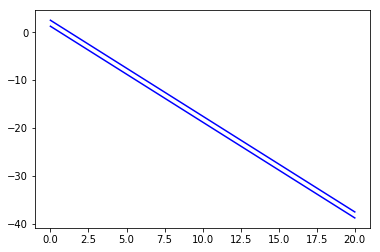

In [126]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 20, 1000)
y1 = -2*x + (5/4)
y2 = -2*x + (5/2)

plt.plot(x, y1, c='blue')
plt.plot(x, y2, c='blue')

These lines can never intersect and hence there is no solution which means this system of equations is inconsistent.

Another way to look at this is, calculating the determinant of the matrix.

$A = 
\left[\begin{array}{rr}
8 & 4 \\ 
4 & 2 
\end{array}\right]$

which is

$det(A) = ad - bc$

which is 

$det(A) = 8*2 - 4*4 = 0$

## Nonhomogenous Systems

So far, we've only looked at linear systems where the constants vector ($\vec{b}$) doesn't contain all zeroes. These linear systems are known as nonhomogenous systems. Here's the nonhomogenous system from earlier:

$\left[\begin{array}{rr|r}
8 & 4 & 5 \\ 
4 & 2 & 5
\end{array}\right]$

On the other hand, when the constant vector is equal to the zero vector, that system is known as a homogenous system. Here's an example:

$\left[\begin{array}{rr|r}
8 & 4 & 0 \\ 
4 & 2 & 0
\end{array}\right]$

The distinction exists because homogenous systems always have a solution, the zero vector. We'll explore the homogenous system more in the next few steps. For now, let's explore __`nonhomogenous`__ systems further.

__Square, Nonhomogenous System__

For square, nonhomogenous systems, there are 3 possible solutions:

- no solution
- a single solution
- infinitely many solutions

Here's a diagram that compares the 3 different possible solutions in a simple, 2D nonhomogenous linear system. These ideas extend past 2 dimensions, but it's easier to build intuition in 2 dimensions.

![](la_img5.svg)

__Rectangular, Nonhomogenous System__

For a rectangular (nonsquare), nonhomogenous systems, there are 2 possible solutions:

- no solution
- infinitely many solutions

Let's look at a higher dimensional example:

$\left[\begin{array}{rrr|r}
1 & 0 & 3 & 1\\ 
1 & 2 & 1 & 2
\end{array}\right]$

The first step to transform this matrix into echelon form is to subtract row 1 from row 2 (R2 - R1):

$\left[\begin{array}{rrr|r}
1 & 0 & 3 & 1\\ 
0 & 2 & -2 & 1
\end{array}\right]$

The second step is to divide row 2 by 2 (R2/2):

$\left[\begin{array}{rrr|r}
1 & 0 & 3 & 1\\ 
0 & 1 & -1 & 1/2
\end{array}\right]$

If we convert this system back to equation form, we get the following system:

$x_1 + 3x_3 = 1 \\ 
x_2 - x_3 = 1/2$

If we solve for each variable, we get the following solution:

$x_1 = 1 - 3x_3 \\ 
x_2 = 1/2 + x_3$

$x_3$ is known as a `free variable`, because it's allowed to vary freely. You'll notice that both $x_1$ and $x_2$ are expressed in terms of $x_3$. `This system has infinitely many solutions`, because for any real number we plug in for $x_3$, we'll get different values for $x_1$ and $x_2$.

Said another way, there are infinite solutions to this system because there's an infinite number of values that  could be that make this system true. This set of infinite solutions is known as a `solution space`. Let's test this using some random examples.

## Homogenous Systems

We can solve any homogenous system, $A\vec{x} = 0$, by setting  to the zero vector . This is known as the trivial solution, since it isn't a particularly useful solution for us. For homogenous systems, we're interested in determining if infinitely many solutions exist or not. Let's look at a concrete example:

$\left[\begin{array}{rrr|r}
6 & 10 & -8 & 0\\ 
-6 & -4 & 8 & 0 \\
3 & 1/2 & -4 & 0
\end{array}\right]$

After standard row reduction to echelon form, here's what the matrix looks like:

$\left[\begin{array}{rrr|r}
3 & 5 & -4 & 0\\ 
0 & 3 & 0 & 0 \\
0 & 0 & 0 & 0
\end{array}\right]$

Interestingly, the last row is the equation $0 = 0$. If the last row contained an untrue equation like $0 = 3$, then the system has no solution. For this system, however, we can continue reducing to find the solution space. We eventually get to the following matrix:

$\left[\begin{array}{rrr|r}
1 & 0 & -4/3 & 0\\ 
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0
\end{array}\right]$

If we convert this to equation form, we get:

$x_1 - \frac{4}{3} x_3 = 0 \\
x_2 = 0$

In this system, $x_3$ is a free variable, $x_1 = \frac{4}{3}x_3$ and $x_2 = 0$. Changing $x_3$ leads to a different, valid solution. Because $x_3$ can be any real number (of which there are an infinite amount), we can find an infinite number of solutions to the system.

When the solution is a solution space (and not just a unique set of values), it's common to rewrite it into `parametric vector form`. Here's what that looks like:

$\vec{x} = x_3* \begin{bmatrix}
4/3\\
0 \\
1
\end{bmatrix}$

The parametric vector form of the solution space hopefully makes the infinite nature of the solution space more apparent.

### Exercise 8

- Create a function named test_homog() that accepts a single parameter: x3.
    - This function should first use the parameter value to calculate x1 and x2. Use the solution functions we just calculated and assign to x1 and x2.
    - Then, this function should plug in x1, x2, and x3 into the original linear system (feel free to use the echelon form instead for compactness) and return True if both equations are true and False otherwise. You'll need to convert the initial, augmented matrix representation of the system to standard form by hand first.
- Use the test_homog() function to see if setting x3 to 1 returns True. Assign the result of the function to b_one.
- Use the test_homog() function to see if setting x3 to -10 returns True. Assign the result of the function to b_two.

In [127]:
def test_homog(x3):
    x1 = float(4/3*x3)
    x2 = 0
    return((3*x1 + 5*x2 - 4*x3 == 0) and (x2 == 0))

b_one = test_homog(1)
b_two = test_homog(-10)

In [128]:
print(b_one)

True


In [129]:
print(b_two)

True


In this course, we've explored a few different ways to classify linear systems.

__Square vs. Rectangular__

When $A$ is a square matrix, we can compute the determinant to determine if there's a solution and the matrix inverse if the determinant isn't equal to $0$. Unfortunately, computing the determinant and matrix inverse are very computationally intensive and should only be used for low dimensional matrices. These techniques are incredibly useful when working with small linear systems by hand, however.

When $A$ is a rectangular matrix, we're looking to determine if the system has no solutions or infinitely many solutions using Gaussian elimination. If the latter, it's common to express the solution space in parametric vector form.

__Nonhomogenous vs. Homogenous__

When $A$ is nonhomogenous, the linear system can contain zero, one, or infinitely many solutions. However, if $A$ is rectangular and nonhomogenous, it can't contain just a unique solution (there will always be a free variable).

When $A$ is homogenous, the linear system always contains the trivial solution (the zero vector). To determine if there's a solution space, we need to use Gaussian elimination to see if there are any inconsistent equations. If not, we can express the solution space in parametric form using the free variable.